In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tweets_sentiment_df = pd.read_csv('data/twitter_sentiment_analysis.csv')
tweets_sentiment_df.head()

,datetime,tweet_id,text,username,like_count,display_name,lang,score,neg,neu,pos,compound,sentiment
0,2022-07-15 23:56:53+00:00,1548094282900221953,government considering creating second state o...,TimesLIVE,85,Times LIVE,en,"{'neg': 0.086, 'neu': 0.823, 'pos': 0.091, 'co...",0.086,0.823,0.091,0.0258,Neutral
1,2022-07-15 23:50:41+00:00,1548092722166132738,way fix current energy crisis splitting eskom ...,KingTNgema,0,Born A King,en,"{'neg': 0.123, 'neu': 0.751, 'pos': 0.126, 'co...",0.123,0.751,0.126,-0.2263,Negative
2,2022-07-15 23:43:00+00:00,1548090785450434566,awarded pushed zuma brian molefe guptas mine g...,Constitution_94,0,Constitution First 🇿🇦,en,"{'neg': 0.078, 'neu': 0.817, 'pos': 0.105, 'co...",0.078,0.817,0.105,0.1779,Positive
3,2022-07-15 23:39:22+00:00,1548089872287555584,use gold reserve sort eskom sa debt market fac...,mdange39,0,Tupac,en,"{'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'comp...",0.298,0.702,0.000,-0.6249,Negative
4,2022-07-15 23:33:36+00:00,1548088419787517957,eskom really realigning sleep schedule,kokovee,0,In ❤ with the Koko,en,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,Neutral


In [3]:
tweets_sentiment_df.groupby(by='sentiment').mean()

,tweet_id,like_count,neg,neu,pos,compound
sentiment,,,,,,
Negative,1.530423e+18,7.870288,0.276939,0.657212,0.065848,-0.418055
Neutral,1.529625e+18,5.987090,0.014841,0.969387,0.015774,0.000101
Positive,1.529989e+18,7.062048,0.053355,0.675677,0.270969,0.392922
Very Negative,1.530878e+18,9.816610,0.428545,0.530875,0.040581,-0.837895
Very Positive,1.530265e+18,19.000959,0.028497,0.543109,0.428395,0.822934


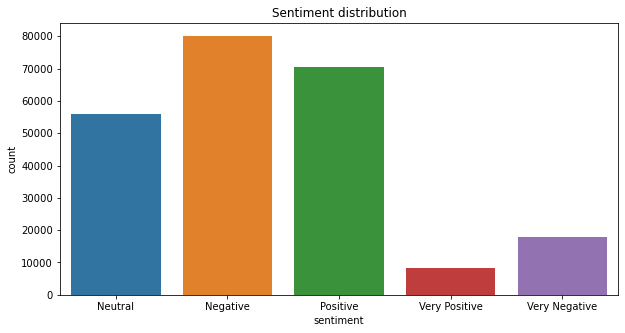

In [4]:
plt.figure(figsize=(10,5))
sns_plot = sns.countplot(x='sentiment', data=tweets_sentiment_df)
plt.title('Sentiment distribution')
plt.show();
fig = sns_plot.get_figure()
fig.savefig('plots/Sentiment distribution.jpg')

In [5]:
tweets_sentiment_df['datetime'] = pd.to_datetime(tweets_sentiment_df['datetime'])

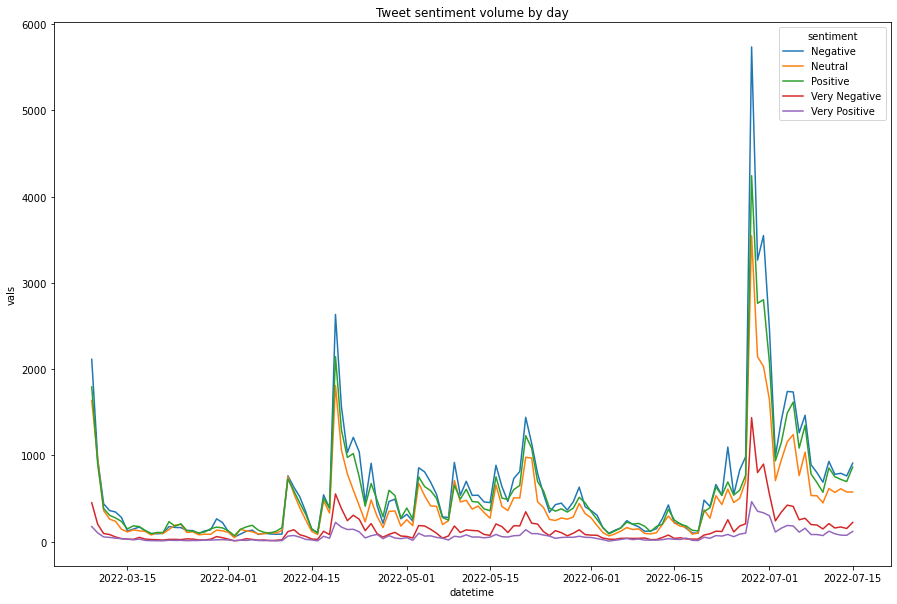

In [6]:
timeline_day = tweets_sentiment_df.resample('D', on='datetime')['sentiment'].value_counts().unstack(1)
timeline_day.reset_index(inplace=True)

timeline_day = timeline_day.melt('datetime', var_name='sentiment',  value_name='vals')
plt.figure(figsize=(15,10))
sns_plot = sns.lineplot(x='datetime', y='vals', hue='sentiment', data=timeline_day);
plt.title('Tweet sentiment volume by day')
plt.show();
fig = sns_plot.get_figure()
fig.savefig('plots/Sentiment volume by day.jpg')

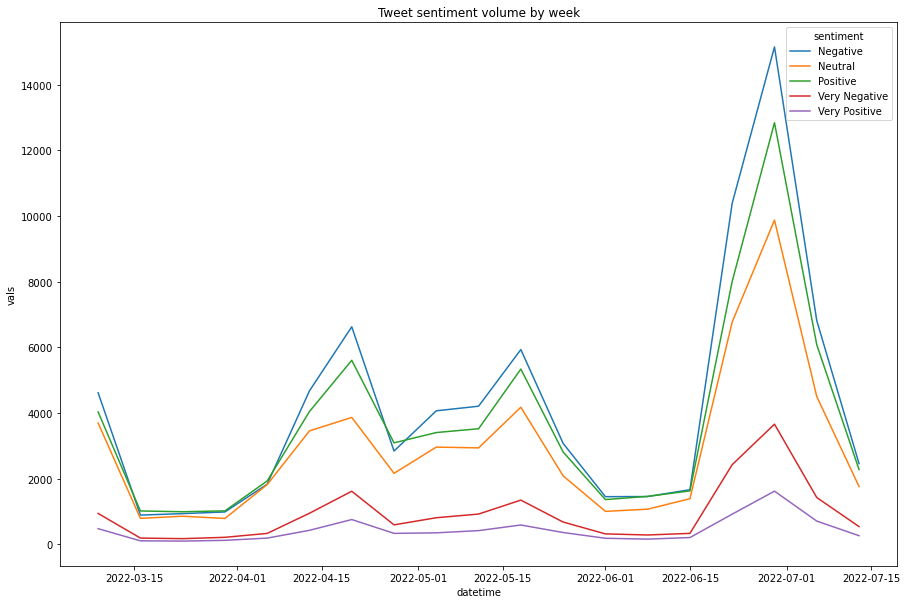

In [7]:
timeline_week = tweets_sentiment_df.resample('7D', on='datetime')['sentiment'].value_counts().unstack(1)
timeline_week.reset_index(inplace=True)

timeline_week = timeline_week.melt('datetime', var_name='sentiment',  value_name='vals')
plt.figure(figsize=(15,10))
sns_plot = sns.lineplot(x='datetime', y='vals', hue='sentiment', data=timeline_week);
plt.title('Tweet sentiment volume by week')
plt.show();
fig = sns_plot.get_figure()
fig.savefig('plots/Sentiment volume by week.jpg')

In [8]:
tweets_topic_df = pd.read_csv('data/twitter_topic_classification.csv')
tweets_topic_df.head()

,datetime,tweet_id,text,username,like_count,display_name,lang,topic
0,2022-07-15 23:56:53+00:00,1548094282900221953,government considering creating second state o...,TimesLIVE,85,Times LIVE,en,Different ways to generate electricity
1,2022-07-15 23:50:41+00:00,1548092722166132738,way fix current energy crisis splitting eskom ...,KingTNgema,0,Born A King,en,Different ways to generate electricity
2,2022-07-15 23:43:00+00:00,1548090785450434566,awarded pushed zuma brian molefe guptas mine g...,Constitution_94,0,Constitution First 🇿🇦,en,ANC State capture
3,2022-07-15 23:39:22+00:00,1548089872287555584,use gold reserve sort eskom sa debt market fac...,mdange39,0,Tupac,en,Different ways to generate electricity
4,2022-07-15 23:33:36+00:00,1548088419787517957,eskom really realigning sleep schedule,kokovee,0,In ❤ with the Koko,en,Loadshedding times


In [9]:
tweets_topic_df.groupby(by='topic').mean()

,tweet_id,like_count
topic,,
ANC State capture,1.529990e+18,9.544923
Current Eskom CEO Andre de Ruyter,1.530058e+18,11.101261
Different ways to generate electricity,1.531051e+18,6.270238
Eskom workers striking,1.533119e+18,11.042395
Loadshedding by city,1.528182e+18,8.786012
Loadshedding for longer than scheduled,1.529029e+18,6.367116
Loadshedding times,1.530284e+18,5.260467


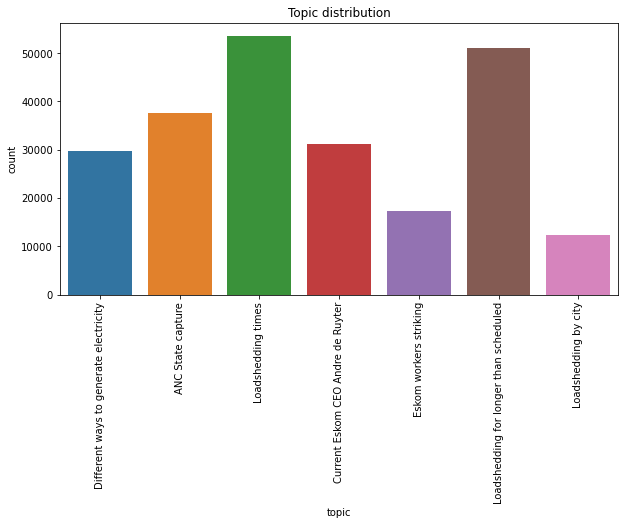

In [10]:
plt.figure(figsize=(10,5))
sns_plot = sns.countplot(x='topic', data=tweets_topic_df)
plt.title('Topic distribution')
plt.xticks(rotation = 90)
plt.show();
fig = sns_plot.get_figure()
fig.savefig('plots/Topic distribution.jpg')

In [11]:
tweets_topic_df['datetime'] = pd.to_datetime(tweets_topic_df['datetime'])

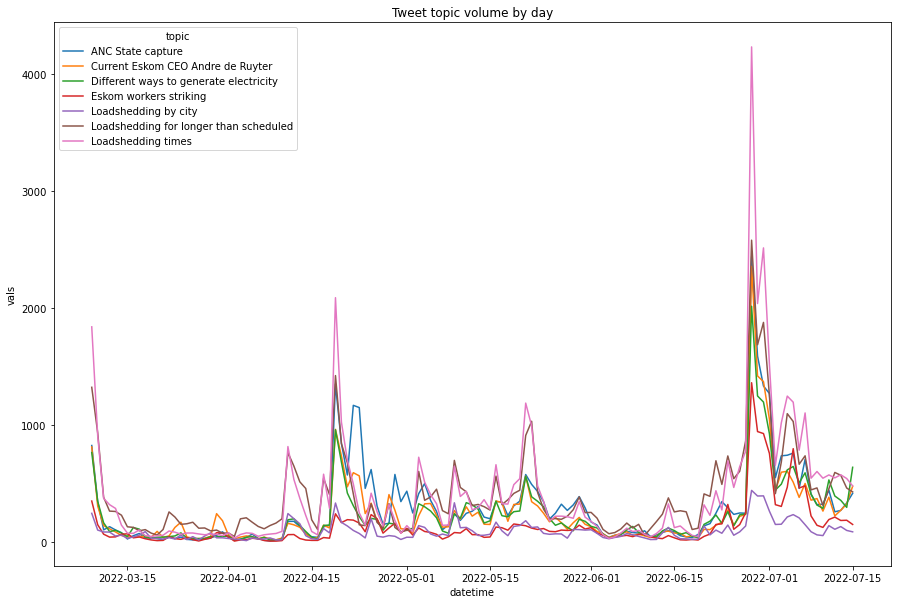

In [12]:
timeline_day = tweets_topic_df.resample('D', on='datetime')['topic'].value_counts().unstack(1)
timeline_day.reset_index(inplace=True)

timeline_day = timeline_day.melt('datetime', var_name='topic',  value_name='vals')
plt.figure(figsize=(15,10))
sns_plot = sns.lineplot(x='datetime', y='vals', hue='topic', data=timeline_day);
plt.title('Tweet topic volume by day')
plt.show();
fig = sns_plot.get_figure()
fig.savefig('plots/Topic volume by day.jpg')

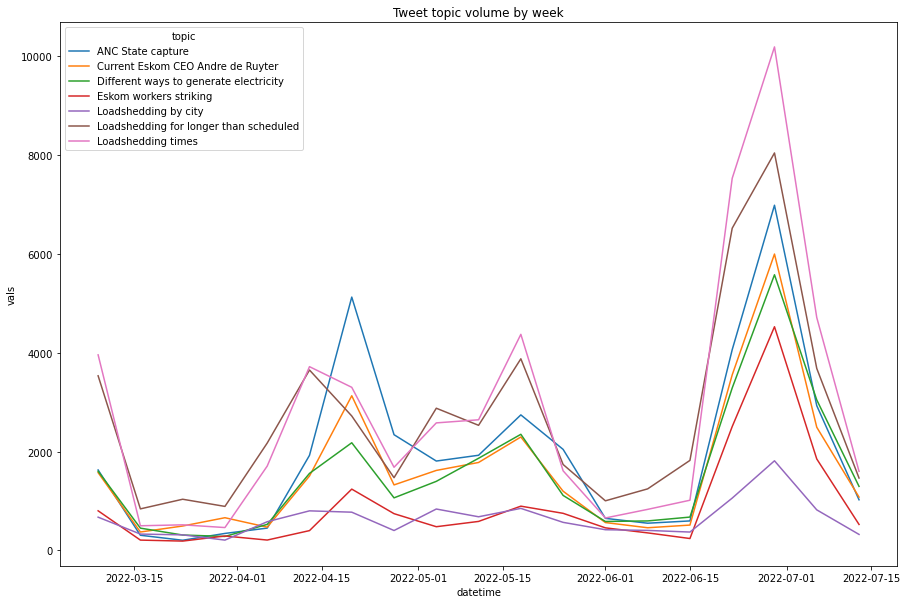

In [13]:
timeline_week = tweets_topic_df.resample('7D', on='datetime')['topic'].value_counts().unstack(1)
timeline_week.reset_index(inplace=True)

timeline_week = timeline_week.melt('datetime', var_name='topic',  value_name='vals')
plt.figure(figsize=(15,10))
sns_plot = sns.lineplot(x='datetime', y='vals', hue='topic', data=timeline_week);
plt.title('Tweet topic volume by week')
plt.show();
fig = sns_plot.get_figure()
fig.savefig('plots/Topic volume by week.jpg')